In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [55]:
df = pd.read_csv('shopping_trends.csv')

In [56]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# Задание 1.1
## Гипотезы:

Гипотеза 1:
* Мужчины покупают товар Sandals чаще, чем женщины.

Гипотеза 2:
* Мужчины младше 25 покупают Hoodie чаще, чем мужчины старше 25.

Гипотеза 3:
* Женщины чаще покупают одежду в ярких цветах (например, красный, розовый) по сравнению с мужчинами.

Гипотеза 4:
* Покупатели, использующие промокоды, тратят больше на покупки.

Гипотеза 5:
* Молодые люди (до 25 лет) чаще используют промокоды.

Гипотеза 6:
* Женщины чаще оставляют высокие оценки отзывов, чем мужчины.

Гипотеза 7:
* Чем выше возраст покупателя, тем больше он тратит на покупку.

Гипотеза 8:
* Мужчины чаще покупают одежду тёмных цветов (например, "Gray", "Black").


In [57]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Гипотеза 1
# Мужчины покупают товар Sandals чаще, чем женщины
sandals_gender = df[df['Item Purchased'] == 'Sandals']['Gender'].value_counts()
print("Гипотеза 1 - Частота покупок Sandals:")
print(sandals_gender)
chi2, p_value = stats.chisquare(sandals_gender)
print("Хи-квадрат:", chi2, "p-value:", p_value)
if p_value > 0.05:
    print("Нет статистически значимых различий в покупке Sandals между мужчинами и женщинами.\n")
else:
    print("Есть статистически значимые различия: мужчины действительно покупают Sandals чаще.\n")

# Гипотеза 2
# Мужчины младше 25 покупают Hoodie чаще, чем мужчины старше 25
hoodie_age = df[(df['Gender'] == 'Male') & (df['Item Purchased'] == 'Hoodie')]
under_25 = hoodie_age[hoodie_age['Age'] < 25].shape[0]
over_25 = hoodie_age[hoodie_age['Age'] >= 25].shape[0]
print("Гипотеза 2 - Hoodie покупки (младше 25 / старше 25):")
print("Младше 25:", under_25, "Старше 25:", over_25)
chi2, p_value = stats.chisquare([under_25, over_25])
print("Хи-квадрат:", chi2, "p-value:", p_value)
if p_value > 0.05:
    print("Нет статистически значимых различий в частоте покупок Hoodie мужчинами младше и старше 25 лет.\n")
else:
    print("Есть статистически значимые различия: мужчины младше 25 лет покупают Hoodie чаще.\n")

# Гипотеза 3
# Женщины чаще покупают одежду в ярких цветах (например, красный, розовый)
bright_colors = ['Red', 'Pink']
bright_by_gender = df[df['Color'].isin(bright_colors)]['Gender'].value_counts()
print("Гипотеза 3 - Покупки ярких цветов по полу:")
print(bright_by_gender)
chi2, p_value = stats.chisquare(bright_by_gender)
print("Хи-квадрат:", chi2, "p-value:", p_value)
if p_value > 0.05:
    print("Нет статистически значимых различий в покупке ярких цветов между мужчинами и женщинами.\n")
else:
    print("Есть статистически значимые различия: женщины чаще покупают одежду в ярких цветах.\n")

# Гипотеза 4
# Покупатели, использующие промокоды, тратят больше на покупки
promo_code = df.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()
print("Гипотеза 4 - Средняя сумма покупок (без/с промокодом):")
print(promo_code)
t_stat, p_value = stats.ttest_ind(
    df[df['Promo Code Used'] == 'Yes']['Purchase Amount (USD)'],
    df[df['Promo Code Used'] == 'No']['Purchase Amount (USD)']
)
print("t-статистика:", t_stat, "p-value:", p_value)
if p_value > 0.05:
    print("Нет статистически значимых различий: использование промокодов не влияет на среднюю сумму покупок.\n")
else:
    print("Есть статистически значимые различия: покупатели с промокодами тратят больше.\n")

# Гипотеза 5
# Молодые люди (до 25 лет) чаще используют промокоды
promo_by_age = df[df['Promo Code Used'] == 'Yes']
under_25 = promo_by_age[promo_by_age['Age'] < 25].shape[0]
over_25 = promo_by_age[promo_by_age['Age'] >= 25].shape[0]
print("Гипотеза 5 - Использование промокодов (младше 25 / старше 25):")
print("Младше 25:", under_25, "Старше 25:", over_25)
chi2, p_value = stats.chisquare([under_25, over_25])
print("Хи-квадрат:", chi2, "p-value:", p_value)
if p_value > 0.05:
    print("Нет статистически значимых различий: использование промокодов не зависит от возраста.\n")
else:
    print("Есть статистически значимые различия: молодые люди (до 25 лет) чаще используют промокоды.\n")

# Гипотеза 6
# Женщины чаще оставляют высокие оценки отзывов, чем мужчины
high_ratings = df[df['Review Rating'] >= 4.0]['Gender'].value_counts()
print("Гипотеза 6 - Высокие оценки по полу:")
print(high_ratings)
chi2, p_value = stats.chisquare(high_ratings)
print("Хи-квадрат:", chi2, "p-value:", p_value)
if p_value > 0.05:
    print("Нет статистически значимых различий: мужчины и женщины оставляют высокие оценки одинаково часто.\n")
else:
    print("Есть статистически значимые различия: женщины чаще оставляют высокие оценки.\n")

# Гипотеза 7
# Чем выше возраст покупателя, тем больше он тратит на покупку
age_spending_corr = stats.pearsonr(df['Age'], df['Purchase Amount (USD)'])
print("Гипотеза 7 - Корреляция возраста и суммы покупок:")
print("Коэффициент корреляции:", age_spending_corr[0], "p-value:", age_spending_corr[1])
if age_spending_corr[1] > 0.05:
    print("Корреляция незначима: возраст не влияет на сумму покупок.\n")
else:
    print("Корреляция значима: чем выше возраст, тем больше сумма покупок.\n")

# Гипотеза 8
# Мужчины чаще покупают одежду тёмных цветов (например, "Gray", "Black")
dark_colors = ['Gray', 'Black']
dark_by_gender = df[df['Color'].isin(dark_colors)]['Gender'].value_counts()
print("Гипотеза 8 - Покупки тёмных цветов по полу:")
print(dark_by_gender)
chi2, p_value = stats.chisquare(dark_by_gender)
print("Хи-квадрат:", chi2, "p-value:", p_value)
if p_value > 0.05:
    print("Нет статистически значимых различий в покупке тёмных цветов между мужчинами и женщинами.\n")
else:
    print("Есть статистически значимые различия: мужчины чаще покупают одежду тёмных цветов.\n")


Гипотеза 1 - Частота покупок Sandals:
Gender
Male      101
Female     59
Name: count, dtype: int64
Хи-квадрат: 11.025 p-value: 0.000898912788114091
Есть статистически значимые различия: мужчины действительно покупают Sandals чаще.

Гипотеза 2 - Hoodie покупки (младше 25 / старше 25):
Младше 25: 11 Старше 25: 89
Хи-квадрат: 60.84 p-value: 6.190717543917382e-15
Есть статистически значимые различия: мужчины младше 25 лет покупают Hoodie чаще.

Гипотеза 3 - Покупки ярких цветов по полу:
Gender
Male      199
Female    102
Name: count, dtype: int64
Хи-квадрат: 31.259136212624586 p-value: 2.2578241952471452e-08
Есть статистически значимые различия: женщины чаще покупают одежду в ярких цветах.

Гипотеза 4 - Средняя сумма покупок (без/с промокодом):
Promo Code Used
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64
t-статистика: -1.1113791657829266 p-value: 0.2664737200577539
Нет статистически значимых различий: использование промокодов не влияет на среднюю сумму поку

# Задание 1.2

Найдем самый популярный товар:

In [58]:
df['Item Purchased'].describe()

count       3900
unique        25
top       Blouse
freq         171
Name: Item Purchased, dtype: object

### Интерпретация

Как видно по выводу, чаще всего встречается Blouse (171 раз)

* Построим расперделение покупателей по полу:

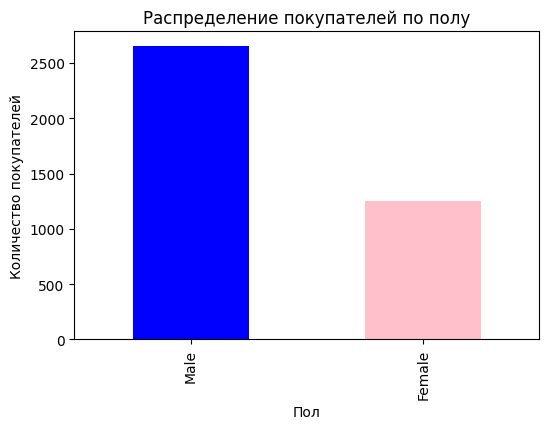

In [59]:
gender_distribution = df['Gender'].value_counts()
plt.figure(figsize=(6, 4))
gender_distribution.plot(kind='bar', color=['blue', 'pink'])
plt.title('Распределение покупателей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество покупателей')
plt.show()

In [60]:
# Суммарные покупки по полу
most_purchases_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum()

print("Общий объем покупок по полу:")
print(most_purchases_by_gender)

# Определяем пол с максимальными покупками
most_purchasing_gender = most_purchases_by_gender.idxmax()
print("\nПол с наибольшим объемом покупок:", most_purchasing_gender)


# Суммарные покупки по возрасту
most_purchases_by_age = df.groupby('Age')['Purchase Amount (USD)'].sum()

# Определяем возраст с наибольшими покупками
most_purchasing_age = most_purchases_by_age.idxmax()
print("Возраст с наибольшим объемом покупок:", most_purchasing_age)

# Частота покупок по полу
purchase_frequency_by_gender = df['Gender'].value_counts()

print("\nЧастота покупок по полу:")
print(purchase_frequency_by_gender)

# Определяем пол с наибольшей частотой
most_frequent_gender = purchase_frequency_by_gender.idxmax()
print("\nПол, который покупает чаще всего:", most_frequent_gender)

# Частота покупок по возрасту
purchase_frequency_by_age = df['Age'].value_counts()

# Определяем возраст с наибольшей частотой
most_frequent_age = purchase_frequency_by_age.idxmax()
print("\nВозраст, который покупает чаще всего:", most_frequent_age)

# Средняя стоимость покупки по полу
avg_purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].mean()

print("\nСредняя стоимость покупки по полу:")
print(avg_purchase_by_gender)

# Пол с самыми дорогими покупками
most_expensive_gender = avg_purchase_by_gender.idxmax()
print("\nПол, который покупает самые дорогие товары:", most_expensive_gender)

# Средняя стоимость покупки по возрасту
avg_purchase_by_age = df.groupby('Age')['Purchase Amount (USD)'].mean()

# Возраст с самыми дорогими покупками
most_expensive_age = avg_purchase_by_age.idxmax()
print("Возраст, который покупает самые дорогие товары:", most_expensive_age)


Общий объем покупок по полу:
Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64

Пол с наибольшим объемом покупок: Male
Возраст с наибольшим объемом покупок: 49

Частота покупок по полу:
Gender
Male      2652
Female    1248
Name: count, dtype: int64

Пол, который покупает чаще всего: Male

Возраст, который покупает чаще всего: 69

Средняя стоимость покупки по полу:
Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64

Пол, который покупает самые дорогие товары: Female
Возраст, который покупает самые дорогие товары: 53


* Определение зависимости междуцветом одежды и сезоном:

In [61]:
from scipy.stats import chi2_contingency

# Таблица сопряженности
color_season_table = pd.crosstab(df['Color'], df['Season'])

# Тест хи-квадрат
chi2, p, dof, expected = chi2_contingency(color_season_table)

print("Хи-квадрат: ", chi2)
print("p-value: ", p)

# Интерпретация
if p < 0.05:
    print("Есть статистически значимая зависимость между цветом одежды и сезоном.")
else:
    print("Нет статистически значимой зависимости между цветом одежды и сезоном.")

Хи-квадрат:  64.6506366841786
p-value:  0.718551112120402
Нет статистически значимой зависимости между цветом одежды и сезоном.


* Определим сезонный MAU:

In [62]:
# Сезонный MAU
seasonal_mau = df.groupby('Season')['Customer ID'].nunique()

print("Сезонный MAU:")
print(seasonal_mau)

# Для анализа динамики MAU
seasonal_mau_change = seasonal_mau.pct_change() * 100
print("\nДинамика MAU (изменение в процентах):")
print(seasonal_mau_change)

Сезонный MAU:
Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Customer ID, dtype: int64

Динамика MAU (изменение в процентах):
Season
Fall           NaN
Spring    2.461538
Summer   -4.404404
Winter    1.675393
Name: Customer ID, dtype: float64


* Найдем самую популярную букву в названии одежды:

In [63]:
from collections import Counter

# Конкатенируем все названия одежды в одну строку и подсчитываем частоту букв
item_names = ''.join(df['Item Purchased'].dropna()).replace(' ', '').lower()
letter_counts = Counter(item_names)

# Самая популярная буква
most_common_letter = letter_counts.most_common(1)
print("Самая популярная буква в названиях одежды: ", most_common_letter[0][0])
print("Количество вхождений: ", most_common_letter[0][1])


Самая популярная буква в названиях одежды:  s
Количество вхождений:  4063


# Задание 2

In [64]:
df = pd.read_csv("drinks.csv")
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [65]:
max_beer_country = df.loc[df['beer_servings'].idxmax(), ['country', 'beer_servings']]
print(f"Страна с самым большим потреблением пива: {max_beer_country['country']} ({max_beer_country['beer_servings']} порций)")

max_wine_country = df.loc[df['wine_servings'].idxmax(), ['country', 'wine_servings']]
print(f"Страна с самым большим потреблением вина: {max_wine_country['country']} ({max_wine_country['wine_servings']} порций)")

max_spirit_country = df.loc[df['spirit_servings'].idxmax(), ['country', 'spirit_servings']]
print(f"Страна с самым большим потреблением спиртных напитков: {max_spirit_country['country']} ({max_spirit_country['spirit_servings']} порций)")

max_total_country = df.loc[df['total_litres_of_pure_alcohol'].idxmax(), ['country', 'total_litres_of_pure_alcohol']]
print(f"Страна с самым большим общим потреблением алкоголя: {max_total_country['country']} ({max_total_country['total_litres_of_pure_alcohol']} литров)")



Страна с самым большим потреблением пива: Namibia (376 порций)
Страна с самым большим потреблением вина: France (370 порций)
Страна с самым большим потреблением спиртных напитков: Grenada (438 порций)
Страна с самым большим общим потреблением алкоголя: Belarus (14.4 литров)


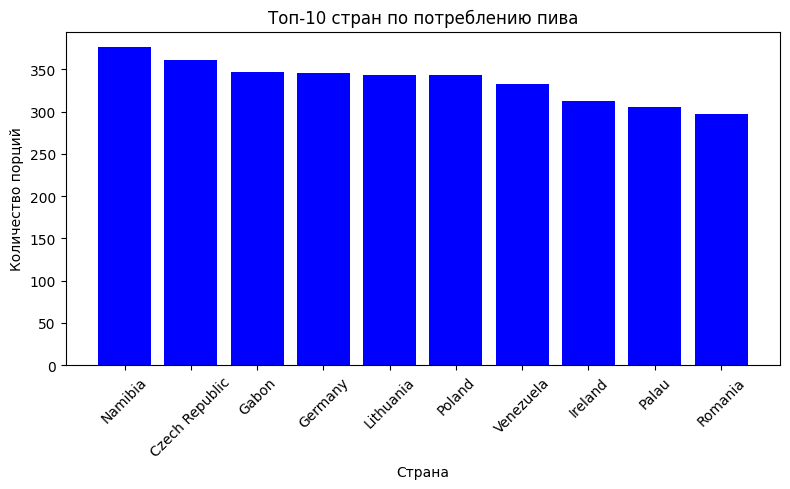

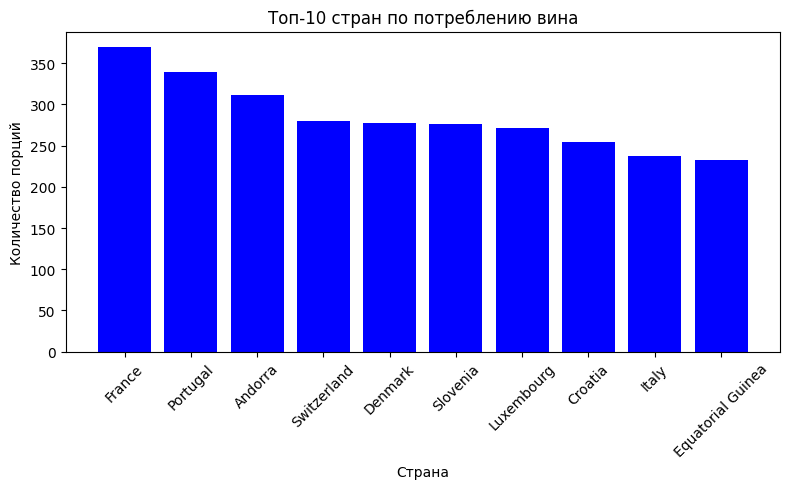

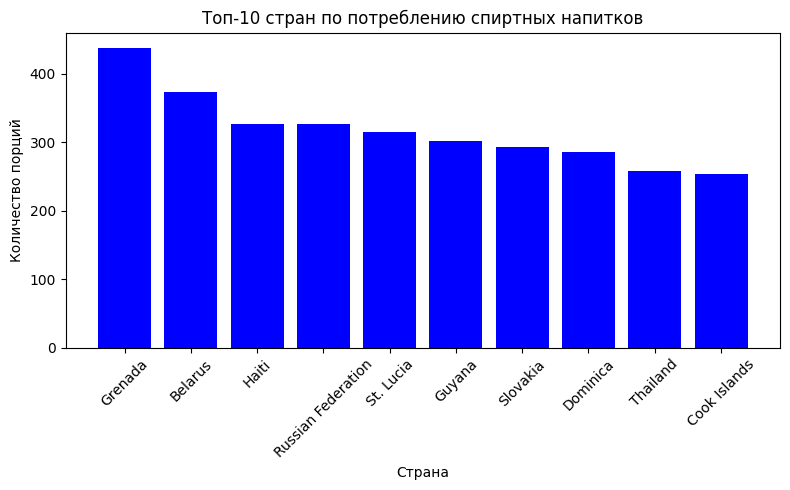

In [66]:
def plot_top10(df, column, title):
    top5 = df.nlargest(10, column)[['country', column]]
    plt.figure(figsize=(8, 5))
    plt.bar(top5['country'], top5[column], color="blue")
    plt.title(title)
    plt.xlabel('Страна')
    plt.ylabel('Количество порций')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_top10(df, 'beer_servings', 'Топ-10 стран по потреблению пива')
plot_top10(df, 'wine_servings', 'Топ-10 стран по потреблению вина')
plot_top10(df, 'spirit_servings', 'Топ-10 стран по потреблению спиртных напитков')

# Аналогично можно построить графики для вина и спиртных напитков


# Задание 3

In [67]:
df = pd.read_csv("tarantino.csv")
df.head()

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


Общее число проклятий и летальных исходов:
type
word     1704
death     190
Name: count, dtype: int64


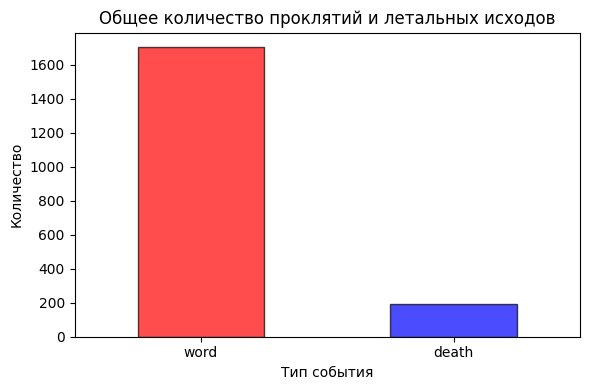

In [68]:
# Подсчет общего числа проклятий и летальных исходов
total_counts = df['type'].value_counts()

# Вывод результатов
print("Общее число проклятий и летальных исходов:")
print(total_counts)

plt.figure(figsize=(6, 4))
total_counts.plot(kind='bar', color=['red', 'blue'], alpha=0.7, edgecolor='black')
plt.title('Общее количество проклятий и летальных исходов')
plt.xlabel('Тип события')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [69]:
# Подсчет количества проклятий и смертей по фильмам
counts_by_movie = df.groupby(['movie', 'type']).size().unstack(fill_value=0)
counts_by_movie['curse_to_death_ratio'] = counts_by_movie['word'] / counts_by_movie['death']

print(counts_by_movie)

type                 death  word  curse_to_death_ratio
movie                                                 
Django Unchained        47   262              5.574468
Inglorious Basterds     48    58              1.208333
Jackie Brown             4   368             92.000000
Kill Bill: Vol. 1       63    57              0.904762
Kill Bill: Vol. 2       11    69              6.272727
Pulp Fiction             7   469             67.000000
Reservoir Dogs          10   421             42.100000


Частота употребления каждого проклятия:
word
fucking          407
shit             221
fuck             213
n-word           179
ass              140
goddamn          113
motherfucker      70
bitch             64
hell              45
damn              37
motherfucking     27
fucked            25
motherfuckers     15
bullshit          15
dick              14
pussy             11
bastard           10
asshole           10
bitches            9
fucker             8
assholes           5
dicks              5
negro              5
asses              4
shitty             4
shithead           3
damned             3
fucks              3
shitload           2
horseshit          2
japs               2
gooks              2
cunt               2
cocksucker         2
wetback            2
jap                1
asshead            1
fuckup             1
chickenshit        1
slope              1
dickless           1
fuckers            1
gook               1
faggot             1
fuckface           1
cunts     

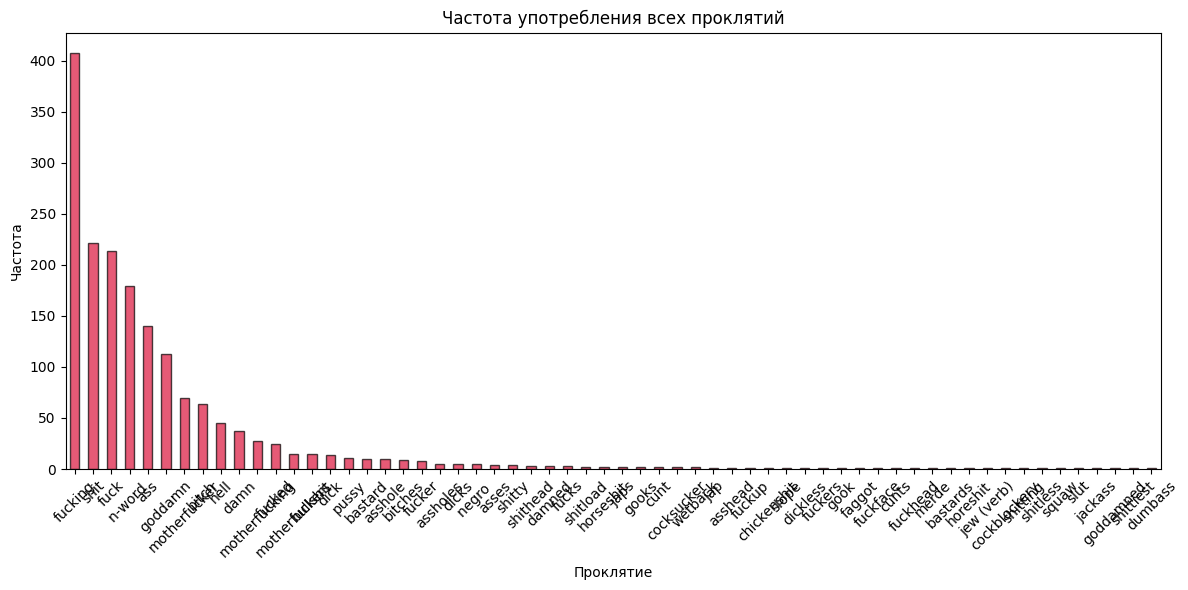

In [70]:
# Подсчет частоты употребления каждого проклятия
curse_frequency = df[df['type'] == 'word']['word'].value_counts()

print("Частота употребления каждого проклятия:")
print(curse_frequency)

plt.figure(figsize=(12, 6))
curse_frequency.plot(kind='bar', color='crimson', alpha=0.7, edgecolor='black')
plt.title('Частота употребления всех проклятий')
plt.xlabel('Проклятие')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


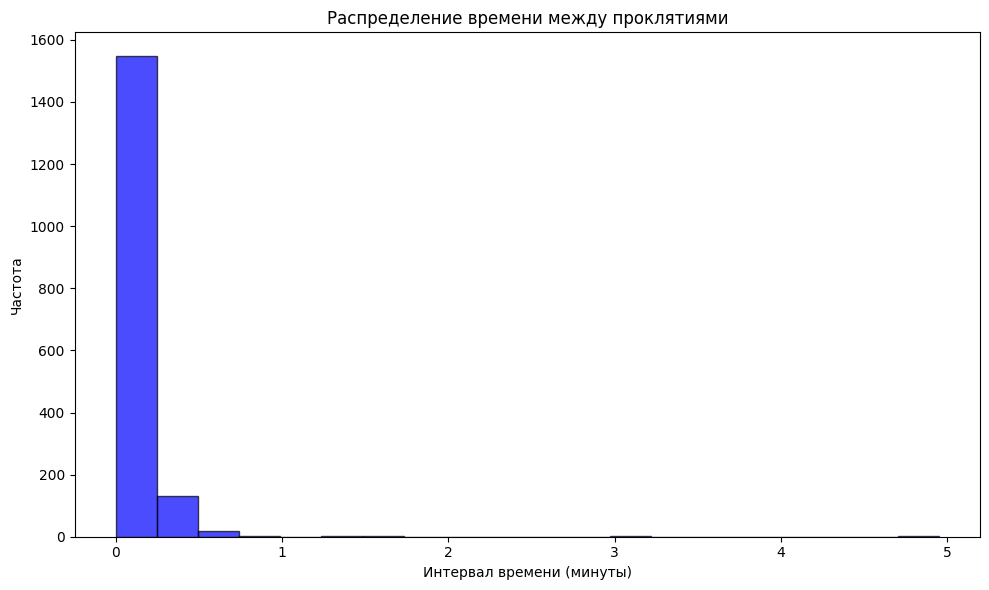

Среднее время между проклятиями: 0.09 минут
Медианное время между проклятиями: 0.05 минут


In [71]:
# Данные о времени проклятий
curse_times = df[df['type'] == 'word']['minutes_in'].dropna().sort_values()

# Расчет времени между проклятиями
time_differences = curse_times.diff().dropna()

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(time_differences, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Распределение времени между проклятиями')
plt.xlabel('Интервал времени (минуты)')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

# Статистика интервалов
print(f'Среднее время между проклятиями: {time_differences.mean():.2f} минут')
print(f'Медианное время между проклятиями: {time_differences.median():.2f} минут')